In [1]:
using Random,Distributions,Plots,Profile,LinearAlgebra,StatsBase

In [2]:
σ=1.0
nd = Normal(0.0, σ/2)

Normal{Float64}(μ=0.0, σ=0.5)

In [3]:
s = rand(nd,(100000,2))
@time c1 = [ ComplexF64(r...) for r in eachrow( s ) ];

  0.147088 seconds (1.06 M allocations: 39.373 MiB, 7.65% gc time, 70.72% compilation time)


In [4]:
@time c2 = [ ComplexF64(r...) for r in eachrow( rand(nd,(100000,2)) ) ];

  0.103874 seconds (869.75 k allocations: 29.726 MiB, 10.31% gc time, 53.28% compilation time)


In [5]:
@time c3 = [ ComplexF64(r...) for r in eachcol( rand(nd,(2,100000)) ) ];

  0.139967 seconds (1.02 M allocations: 38.374 MiB, 6.33% gc time, 69.92% compilation time)


In [6]:
s = rand(nd,(100000,2))
@time c4 = [ ComplexF64(s[i,:]...) for i=1:size(s,1) ];

  0.143310 seconds (890.76 k allocations: 28.322 MiB, 58.38% compilation time)


In [7]:
cov(c1)

0.5024572635857488

In [8]:
cov(c1,c2)

-0.00015465048217061148 - 0.0008867510333239423im

In [9]:
cor(c1,c2)

-0.00030972686919135693 - 0.0017759441642130139im

In [10]:
@time s=randn(ComplexF64,1000);
println("cor = ",cor(s)," cov =",cov(s))
println(length(s))

  0.000017 seconds (1 allocation: 15.750 KiB)
cor = 1.0 cov =0.9919340225090895
1000


In [11]:
snr=range(0.0, stop=60.0, length=200);
C = log.(2, 1 .+ snr);

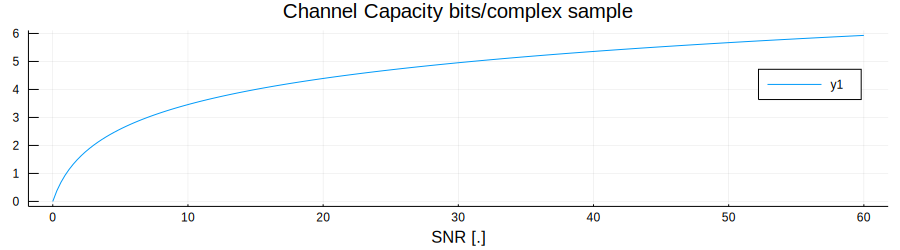

In [12]:
plot(snr,C, size=(900,250))
xlabel!("SNR [.]")
title!("Channel Capacity bits/complex sample")

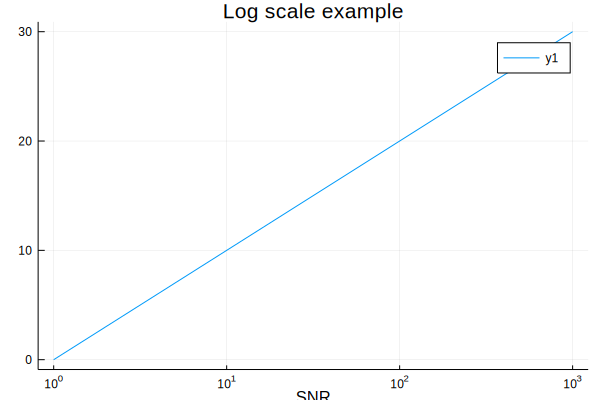

In [13]:
plot(1:1000,10log10.(1:1000))
xaxis!("SNR",:log10)
title!("Log scale example")

  2.105915 seconds (3.77 M allocations: 237.382 MiB, 3.05% gc time, 13.66% compilation time)


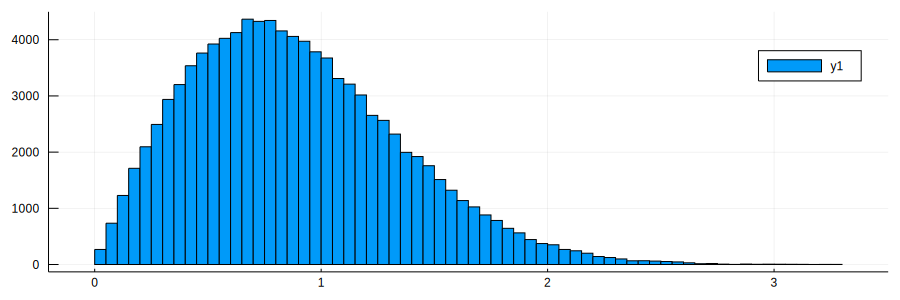

In [14]:
N=norm.(randn(ComplexF64,100000))
@time histogram(N, size=(900,300))

In [15]:
#@time histogram(ecdf(N))
ecdf(N)

ECDF{Vector{Float64}, Weights{Float64, Float64, Vector{Float64}}}([0.0014474355081501428, 0.00254871595806068, 0.004116897656945132, 0.004986052001514862, 0.005852319404808424, 0.0061823150969708566, 0.006471080540076254, 0.00701034887820322, 0.007064353479972334, 0.008047160048298856  …  3.08000892017351, 3.0846769747694496, 3.118870455333439, 3.1285837618579326, 3.135927075976776, 3.1715730864634475, 3.20511806049613, 3.2499178053599005, 3.2634880450666337, 3.2847440046285024], Float64[])

  1.301317 seconds (2.58 M allocations: 163.958 MiB, 2.66% gc time, 17.61% compilation time)


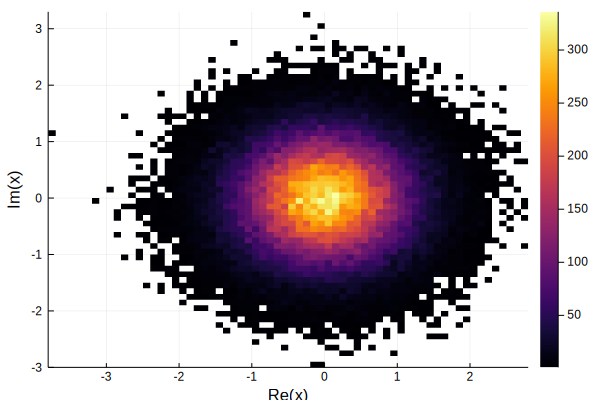

In [16]:
@time histogram2d(randn(ComplexF64,100000))